### Import libraries

In [29]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

###  Load and prepare data
##### Update file path as needed

In [5]:
df = pd.read_csv('liver_cirrhosis.csv')

In [7]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


#### Drop non-predictive columns

### Define feature types

In [9]:
categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
ordinal_features = ['Edema']
numerical_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                     'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
target = 'Stage'

###  Prepare X and y

In [10]:
X = df.drop(target, axis=1)
y = df[target]

### Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### Create preprocessing pipelines
####  Categorical pipeline

In [12]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Ordinal pipeline (Edema: N < S < Y)

In [13]:
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['N', 'S', 'Y']]))
])

### Numerical pipeline

In [14]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


### Combine preprocessing

In [15]:
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_features),
    ('ord', ordinal_pipeline, ordinal_features),
    ('num', numerical_pipeline, numerical_features)
])

### Create model pipeline

In [16]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        class_weight='balanced',
        random_state=42
    ))
])

### Train model

In [17]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('ord', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluate model

In [18]:
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9092

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.88      0.90      1653
           2       0.86      0.93      0.89      1688
           3       0.95      0.92      0.93      1659

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



### Confusion matrix

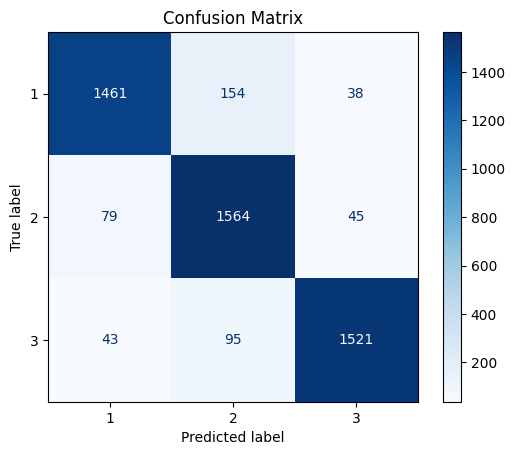

In [19]:
cm = confusion_matrix(y_test, y_pred, labels=[1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

###  Feature importance
##### Get feature names

In [20]:
preprocessor = model.named_steps['preprocessor']
feature_names = []

### Categorical features

In [21]:
cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
feature_names += list(cat_encoder.get_feature_names_out(categorical_features))

###  Ordinal features

In [22]:
feature_names += ordinal_features

### Numerical features

In [23]:
feature_names += numerical_features

### Get importances

In [24]:
importances = model.named_steps['classifier'].feature_importances_
sorted_idx = importances.argsort()[-10:]

### Plot top 10 features

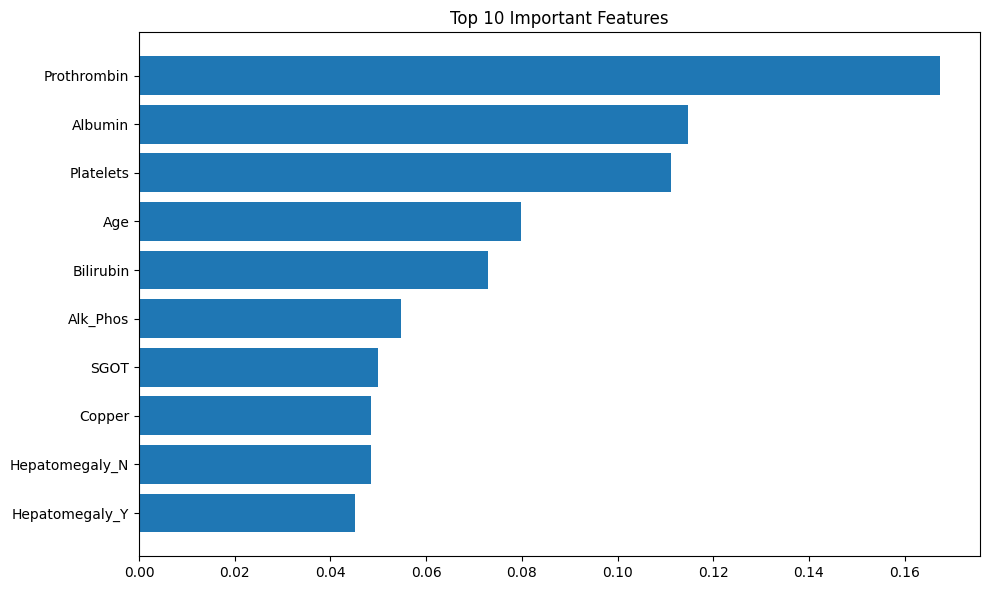

In [25]:
plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title("Top 10 Important Features")
plt.tight_layout()
plt.show()

In [30]:
joblib.dump(model, 'liver_cirrhosis_model.pkl')
print("Model saved as liver_cirrhosis_model.pkl")

Model saved as liver_cirrhosis_model.pkl
